[![AnalyticsDojo](https://github.com/rpi-techfundamentals/spring2019-materials/blob/master/fig/final-logo.png?raw=1)](http://rpi.analyticsdojo.com)
<center><h1>Introduction to Python - Introduction to Pandas</h1></center>
<center><h3><a href = 'http://rpi.analyticsdojo.com'>rpi.analyticsdojo.com</a></h3></center>



# Introduction to Pandas
- Pandas Overview
- Series Objects
- DataFrame Objects
- Slicing and Filtering
- Examples: Financial Data
- Examples: Iris


## Importing Pandas

- The pandas module is usually imported `as pd`.

In [1]:
import pandas as pd

## Pandas (like the rest of Python) is object-oriented

- Pandas is object-oriented.

- We create data frames by constructing instances of different classes.

- The two most important classes are:

    - `Series`
    - `DataFrame`


## Pandas Series
- One-dimensional array 
- Series can be array-like, with a standard integer index starting at 0
- Series can be dictionary-like like, with a defined index

In [45]:
data = [1,2,3,4,5] #This creates a list
my_series = pd.Series(data) # array-like pandas series, index created automatically
my_series2 = pd.Series(data, index=['a', 'b', 'c', 'd', 'e'])  # dict-like, index specified
print(my_series, '\n\n', my_series2)

0    1
1    2
2    3
3    4
4    5
dtype: int64 

 a    1
b    2
c    3
d    4
e    5
dtype: int64


In [3]:
my_series2['a']

1

## Plotting a Series

- We can plot a series by invoking the `plot()` method on an instance of a `Series` object.

- The x-axis will automatically be labelled with the series index.

- This is the first time we are invoking a `magic` command. Read more about them [here](http://ipython.readthedocs.io/en/stable/interactive/magics.html). 

<AxesSubplot:>

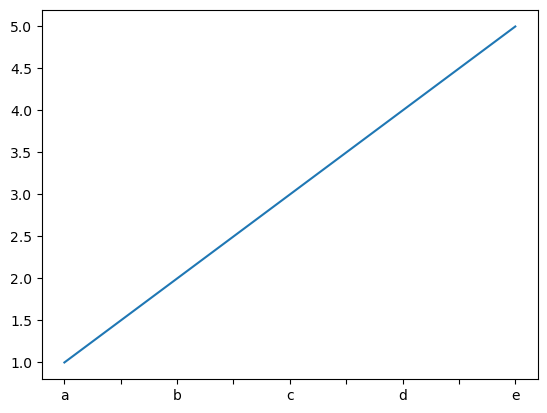

In [46]:
%matplotlib inline
my_series2.plot()

## Creating a Series from a `dict`



In [48]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
my_series = pd.Series(d)
my_series

a    0.0
b    1.0
c    2.0
dtype: float64

## Indexing/Slicing a Series with `[]` or . notation

- Series can be accessed using the same syntax as arrays and dicts.
- We use the labels in the index to access each element.
- We can also use the label like an attribute `my_series.b`
- We can specify a range with `my_series[['b', 'c']]`



In [49]:
#Notice the different ways that the parts of the series are specified. 
print( my_series['b'],'\n\n', my_series.b, '\n\n', my_series[['b', 'c']])

1.0 

 1.0 

 b    1.0
c    2.0
dtype: float64


## Functions on Series

- We can perform calculations using the entire `Series`, similar to numpy.
- Methods are called from within `pd.Series`, for example `pd.Series.add`
- See a variety of series functions [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) 



In [50]:
starter = {'a' : 0., 'b' : 1., 'c' : 2.}

a = pd.Series(starter)
print('Print the entire array a: \n', a)
print()

b1=10*a
print('Mulitiply by 10 directly:\n', b1)
print()

b2=a.multiply(10)
print('Mulitiply by 10 using the function:\n', b2)
print()

c1=a+b1
print('Add a and b together directly:\n', c1)
print()

c2=pd.Series.add(a,b1) #Note we are calling the method of the series class. Numpy used us np.add
print('Add a and b together with a function:\n', c2)
print()


suma=pd.Series.sum(a) #Note we are calling the method of the series class. Numpy used us np.add
print('sum all of a:\n', suma)
print()

f=a**2  #This squares the value. 
print('square a:\n', f)
print()
x = pd.Series({'a' : 0., 'b' : 1., 'c' : 2.})
y = pd.Series({'a' : 3., 'b' : 4., 'c' : 5.})
z = x+y
print('Add 2 series together:\n', z)
print()


Print the entire array a: 
 a    0.0
b    1.0
c    2.0
dtype: float64

Mulitiply by 10 directly:
 a     0.0
b    10.0
c    20.0
dtype: float64

Mulitiply by 10 using the function:
 a     0.0
b    10.0
c    20.0
dtype: float64

Add a and b together directly:
 a     0.0
b    11.0
c    22.0
dtype: float64

Add a and b together with a function:
 a     0.0
b    11.0
c    22.0
dtype: float64

sum all of a:
 3.0

square a:
 a    0.0
b    1.0
c    4.0
dtype: float64

Add 2 series together:
 a    3.0
b    5.0
c    7.0
dtype: float64



## Time Series
- Time series models link specific times with rows.

In [8]:
dates = pd.date_range('1/1/2000', periods=5)
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05'],
              dtype='datetime64[ns]', freq='D')

In [9]:
time_series = pd.Series(data, index=dates)
time_series

2000-01-01    1
2000-01-02    2
2000-01-03    3
2000-01-04    4
2000-01-05    5
Freq: D, dtype: int64

## Plot Time Series
- With a data and a value, the plot command can be used to provide quick visibility in the form of a line graph.

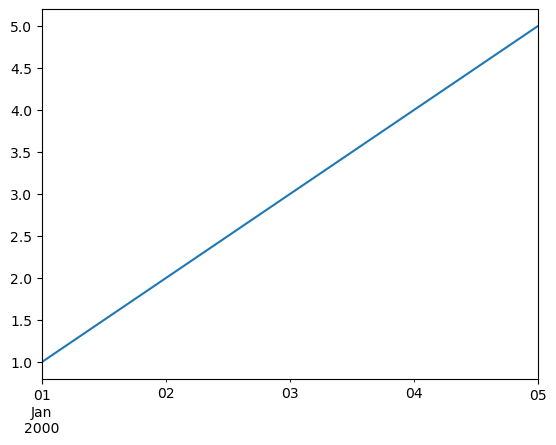

In [10]:
ax = time_series.plot()

In [11]:
type(time_series)

pandas.core.series.Series

In [12]:
time_series

2000-01-01    1
2000-01-02    2
2000-01-03    3
2000-01-04    4
2000-01-05    5
Freq: D, dtype: int64

## DataFrames

- The `pandas` module provides a powerful data-structure called a data frame.

- It is similar, but not identical to:
    - a table in a relational database,
    - an Excel spreadsheet,
    - a dataframe in R.

- A `DataFrame` has multiple columns, each of which can hold a *different* type of value.

- Like a `Series`, it has an index which provides a label for each and every row.


    

## Creating a `DataFrame` from Outside Data
- Data frames can be read and written to/from:
    - database queries, database tables
    - CSV files
    - JSON files

- Beware that data frames are memory-resident:
    - If you read a large amount of data your PC might crash
    - With big data, typically you would read a subset or summary of the data via e.g., a select statement.

## Creating a `DataFrame` from Python Data Structures

- Data frames can be constructed from other data structures in memory:
    - dict of arrays
    - dict of lists
    - dict of dicts
    - dict of `Series`
    - 2-dimensional array
    - a single `Series`
    - another `DataFrame`


## Example: Creating a DataFrame from Multiple Series
- Pandas codes missing (aka null) values as `NaN` rather than `None`
- Series should have matching keys for each matching row.


In [52]:
d = {
        'x' : 
            pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
        'y' : 
            pd.Series([4.,  6., 7.], index=['a',  'c', 'd']),
        'z' :
            pd.Series([0.2, 0.3, 0.4], index=[ 'b', 'c', 'd'])
}

df = pd.DataFrame(d)
print (df)

     x    y    z
a  1.0  4.0  NaN
b  2.0  NaN  0.2
c  3.0  6.0  0.3
d  NaN  7.0  0.4


In [14]:
type(d)

dict

## Plotting DataFrames

- When plotting a data frame, each column is plotted as its own series on the same graph.

- The column names are used to label each series.

- The row names (index) is used to label the x-axis.

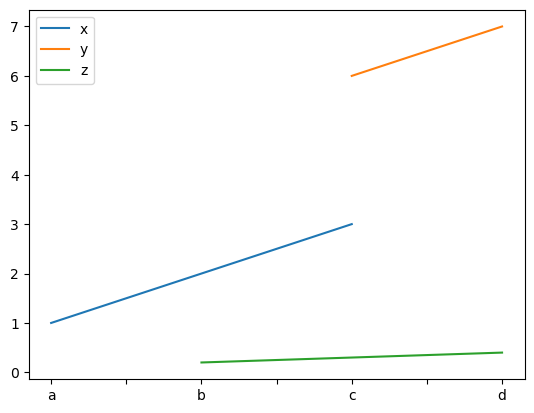

In [15]:
ax = df.plot()

In [16]:
df


,x,y,z
a,1.0,4.0,NaN
b,2.0,NaN,0.2
c,3.0,6.0,0.3
d,NaN,7.0,0.4


## Functions and DataFrames

- We can do calculations and functions with dataframes just like series.
- Functions will typically return a dataframe or a series, depending. 
- To make a copy, don't set two dataframes equal us the `copy` method:  `df2= df.copy()` 

In [17]:
#Info
nulls=df.isnull()
print(nulls, "\n", type(nulls))

nullsum=nulls.sum()

print("\nNull sum for each column \n", nullsum, "\n", type(nullsum))

print("\nWe can slice these results to get the answer for x \n", nullsum.x)
type(nullsum.x)

       x      y      z
a  False  False   True
b  False   True  False
c  False  False  False
d   True  False  False 
 <class 'pandas.core.frame.DataFrame'>

Null sum for each column 
 x    1
y    1
z    1
dtype: int64 
 <class 'pandas.core.series.Series'>

We can slice these results to get the answer for x 
 1


numpy.int64

In [18]:
df2= df.copy()
print(df, '\n', df2)

     x    y    z
a  1.0  4.0  NaN
b  2.0  NaN  0.2
c  3.0  6.0  0.3
d  NaN  7.0  0.4 
      x    y    z
a  1.0  4.0  NaN
b  2.0  NaN  0.2
c  3.0  6.0  0.3
d  NaN  7.0  0.4


In [19]:
df2=df ** 2 #This squares all values. 
print(df2)

     x     y     z
a  1.0  16.0   NaN
b  4.0   NaN  0.04
c  9.0  36.0  0.09
d  NaN  49.0  0.16


## Summary statistics
- To quickly obtain summary statistics on numerical values use the `describe` method.
- You will get a warning if there are missing values.
- The result is itself a DataFrame, that we can slice `dfstats.y['mean']`.

In [20]:
dfstats=df.describe()
dfstats
#type(dfstats)

#END HERE.....

,x,y,z
count,3.0,3.000000,3.00
mean,2.0,5.666667,0.30
std,1.0,1.527525,0.10
min,1.0,4.000000,0.20
25%,1.5,5.000000,0.25
50%,2.0,6.000000,0.30
75%,2.5,6.500000,0.35
max,3.0,7.000000,0.40


In [21]:
xmean = dfstats.x['mean'] #This is the X mean
ystd = dfstats['y']['std'] #This is the Y standardard deviation
print(xmean,'\n',ystd)

2.0 
 1.5275252316519465


## Data Types
- Each will have an inferred data type. 

In [22]:
print(df.dtypes)

x    float64
y    float64
z    float64
dtype: object


## Accessing the Row and Column Labels

- The row labels (index) can be accessed through `df.index`.
- The column labels can be accessed through `df.columns`.


In [23]:
df.index


Index(['a', 'b', 'c', 'd'], dtype='object')

In [24]:
df.columns

Index(['x', 'y', 'z'], dtype='object')

In [25]:
print(df.describe())

         x         y     z
count  3.0  3.000000  3.00
mean   2.0  5.666667  0.30
std    1.0  1.527525  0.10
min    1.0  4.000000  0.20
25%    1.5  5.000000  0.25
50%    2.0  6.000000  0.30
75%    2.5  6.500000  0.35
max    3.0  7.000000  0.40


## Loading Files with Pandas
- We used Pandas in an earlier notebook to load the iris data file.  
- Whenver you have a dataset with a variety of fields of various types, loading it into Pandas is a good strategy.
- You can load data from Azure, from a local file, or from a url.  







In [26]:
!wget https://raw.githubusercontent.com/rpi-techfundamentals/spring2019-materials/master/input/iris.csv

--2023-01-06 16:16:35--  https://raw.githubusercontent.com/rpi-techfundamentals/spring2019-materials/master/input/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3715 (3.6K) [text/plain]
Saving to: 'iris.csv.1'

iris.csv.1          100%[===================>]   3.63K  --.-KB/s    in 0.001s  

2023-01-06 16:16:35 (5.27 MB/s) - 'iris.csv.1' saved [3715/3715]



In [27]:
# Pulling from a local file
frame2 = pd.read_csv('iris.csv')
frame2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


##  Large Dataframes - Head and Tail

- Many times you just want a sampling of the available data
- The `head()` command can view the start of a data frame.
- The `tail()` command can be used to show the end of a data frame. 

In [28]:
frame2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
frame2.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [30]:
# Pulling from a url.  Notice that this is the raw version of the file.
frame3 = pd.read_csv("https://raw.githubusercontent.com/rpi-techfundamentals/spring2019-materials/master/input/iris.csv")
frame3.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Indexing/Slicing Rows of DataFrames
- Simple ways of selecting all rows and colu (`df[:]`)
- Rows can be accessed via a key or a integer corresponding to the row number. 
- Omitting a value generally means *all values* before or after an item.
- When we retrieve a single or mulitiple rows, the result is a Dataframe.
- Several ways, either directly, with `iloc`, or with `loc`. (See Examples).
- Read more [here](http://pandas.pydata.org/pandas-docs/stable/indexing.html)



In [31]:
#This is going to create some sample data that we can work with for our analysis. 

import pandas as pd
import numpy as np
 
#Create a dataframe from a random numpy array 
#http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html
df = pd.DataFrame((20+np.random.randn(10, 4)*5),  columns=['a', 'b', 'c', 'd'] )
print (df)
df2 = pd.DataFrame((20+np.random.randn(10, 4)*5),  columns=['e', 'f', 'g', 'h'] )
print (df2)



           a          b          c          d
0  18.163555  15.939397  18.250634  15.806258
1  19.563151  20.876338  12.791888  22.622864
2  18.954403  16.540246  14.897361  14.836208
3  23.410145  11.300494  22.124443  19.223948
4  25.265425  24.986649  17.469715  25.193185
5  19.716019  17.328552  19.538904  24.804853
6  17.512000   8.454499  14.740806  14.770872
7  24.313846  20.196006  22.185216  27.998339
8  14.105347  24.374610  14.971323  19.831640
9  20.608815  17.195513  10.127412  23.211764
           e          f          g          h
0  12.089638  24.009359  12.856865  21.004281
1  23.714933  17.922771  22.984571  21.216065
2  16.685896  25.377077  22.618126  16.906479
3  16.571005  23.027894  12.194458  18.055375
4   9.983116  17.099741  22.431523  20.768630
5  24.791691  15.564645  15.947830  16.560757
6  18.761182  11.896108  26.477752  33.840468
7  26.379581  23.559996  21.966811  16.727901
8  18.008065  25.870866  15.703992  28.387339
9  20.469320  20.898993  23.057774

## Indexing/Slicing Columns of DataFrames
- Simple ways of selecting colum(s) `frame[[colname(s)]]`. 
- Columns can have one (`df['x']`) or multiple (`df[['x', 'y']]`) columns.
- When specifying one column, one can use simplified dot notation `df.x`.
- When we include multiple columns the slice that result is a DataFrame.
- When we retrieve a single column, the result is a Series.
- When we retrieve mulitiple column, the result is a Dataframe.


In [32]:
#Here we can see that there is a similar structure to R, with selecting the desired columns by passing a list.

print (df[['c', 'd']]) #All rows, column c, d
print (df[[ 'c', 'd']]) #All rows, column c, d
print (df.iloc[:,[0,2,3]]) #All rows, column a,c,d
print (df.iloc[:,0:2])     #All rows, column a-b
print (df.iloc[:,[0,2,3]])     #All rows, column 0,2,3
print (df.loc[:,'a':'b']) #All rows, column a-b
print (df.loc[:,['a','c','d']]) #All rows, columns a, c, d



           c          d
0  18.250634  15.806258
1  12.791888  22.622864
2  14.897361  14.836208
3  22.124443  19.223948
4  17.469715  25.193185
5  19.538904  24.804853
6  14.740806  14.770872
7  22.185216  27.998339
8  14.971323  19.831640
9  10.127412  23.211764
           c          d
0  18.250634  15.806258
1  12.791888  22.622864
2  14.897361  14.836208
3  22.124443  19.223948
4  17.469715  25.193185
5  19.538904  24.804853
6  14.740806  14.770872
7  22.185216  27.998339
8  14.971323  19.831640
9  10.127412  23.211764
           a          c          d
0  18.163555  18.250634  15.806258
1  19.563151  12.791888  22.622864
2  18.954403  14.897361  14.836208
3  23.410145  22.124443  19.223948
4  25.265425  17.469715  25.193185
5  19.716019  19.538904  24.804853
6  17.512000  14.740806  14.770872
7  24.313846  22.185216  27.998339
8  14.105347  14.971323  19.831640
9  20.608815  10.127412  23.211764
           a          b
0  18.163555  15.939397
1  19.563151  20.876338
2  18.954403  1

## Dropping Columns from Dataframes
- Done using the `drop` syntax. 
- [Drop Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

In [33]:
#Here, we can remove columns specifically from a dataframe using the drop method.
df2 = pd.DataFrame((20+np.random.randn(10, 4)*5),  columns=['e', 'f', 'g', 'h'] )
print (df2)
df2.drop(['e','f'], inplace=True, axis=1)
print (df2)

           e          f          g          h
0  16.297475  19.623728  16.946337  24.049994
1  17.332955  17.471395  15.821213  25.962828
2  16.608247  26.782813  17.041967  25.349770
3  18.556268  22.272384  32.586638  19.141068
4  18.344576  29.242450  18.818981  27.571168
5  17.423173  19.118684  15.767807  13.317947
6  23.438000  19.855758  25.533757  25.111176
7  24.793972  14.142683  27.926262  19.539075
8  22.683765  22.197045  21.636627  28.280328
9  18.563834  23.183113  20.107804  21.133582
           g          h
0  16.946337  24.049994
1  15.821213  25.962828
2  17.041967  25.349770
3  32.586638  19.141068
4  18.818981  27.571168
5  15.767807  13.317947
6  25.533757  25.111176
7  27.926262  19.539075
8  21.636627  28.280328
9  20.107804  21.133582


## Selecting Rows
- Similarly, we also might want to select out rows, and we can utilize the same syntax.
- [iloc](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html)

In [34]:

## Selecting rows
print (df[0:3])     #Select rows 1-3
print (df.iloc[0:3,:])     #Select rows 1-3
print (df.iloc[0:3,])      #Select rows 1-3
print (df.iloc[0:3])       #Select rows 1-3
print (df.iloc[[1,2,4]])   #Select rows 1, 2, and 4


           a          b          c          d
0  18.163555  15.939397  18.250634  15.806258
1  19.563151  20.876338  12.791888  22.622864
2  18.954403  16.540246  14.897361  14.836208
           a          b          c          d
0  18.163555  15.939397  18.250634  15.806258
1  19.563151  20.876338  12.791888  22.622864
2  18.954403  16.540246  14.897361  14.836208
           a          b          c          d
0  18.163555  15.939397  18.250634  15.806258
1  19.563151  20.876338  12.791888  22.622864
2  18.954403  16.540246  14.897361  14.836208
           a          b          c          d
0  18.163555  15.939397  18.250634  15.806258
1  19.563151  20.876338  12.791888  22.622864
2  18.954403  16.540246  14.897361  14.836208
           a          b          c          d
1  19.563151  20.876338  12.791888  22.622864
2  18.954403  16.540246  14.897361  14.836208
4  25.265425  24.986649  17.469715  25.193185


## Intro to Filters (Logical indexing)
- Filters are the selection of rows based on criteria.
- We can select based on specific criteria.
- These criteria can be connected together.
- Most of the time we won't specfically assign selection critia to a list. 

In [35]:
# At the foundation of the filter is a boolean array based on some type of condition. 
print(df)
df['a'] >= 20

           a          b          c          d
0  18.163555  15.939397  18.250634  15.806258
1  19.563151  20.876338  12.791888  22.622864
2  18.954403  16.540246  14.897361  14.836208
3  23.410145  11.300494  22.124443  19.223948
4  25.265425  24.986649  17.469715  25.193185
5  19.716019  17.328552  19.538904  24.804853
6  17.512000   8.454499  14.740806  14.770872
7  24.313846  20.196006  22.185216  27.998339
8  14.105347  24.374610  14.971323  19.831640
9  20.608815  17.195513  10.127412  23.211764


0    False
1    False
2    False
3     True
4     True
5    False
6    False
7     True
8    False
9     True
Name: a, dtype: bool

In [36]:
#notice how the logical statement is inside the dataframe specification.  This creates an intermediate boolean array. 
df[df['a'] >= 20]

,a,b,c,d
3,23.410145,11.300494,22.124443,19.223948
4,25.265425,24.986649,17.469715,25.193185
7,24.313846,20.196006,22.185216,27.998339
9,20.608815,17.195513,10.127412,23.211764


In [37]:
#This is an alternate method where we first set the boolean array. 
included=df['a'] >= 20
df[included]


,a,b,c,d
3,23.410145,11.300494,22.124443,19.223948
4,25.265425,24.986649,17.469715,25.193185
7,24.313846,20.196006,22.185216,27.998339
9,20.608815,17.195513,10.127412,23.211764


In [38]:
#We can now generate a vector based on a critera and then use this for selection
select = df['a']>=20
print (select,type(select))
print (df.loc[select,'a']) #Notice by including only one variable we are selecting rows and all columns.

select2 = (df['a']>20) & (df['c'] < 30)  #More complex criteria
print (select2)
print (df.loc[select2,['a','c']])



0    False
1    False
2    False
3     True
4     True
5    False
6    False
7     True
8    False
9     True
Name: a, dtype: bool <class 'pandas.core.series.Series'>
3    23.410145
4    25.265425
7    24.313846
9    20.608815
Name: a, dtype: float64
0    False
1    False
2    False
3     True
4     True
5    False
6    False
7     True
8    False
9     True
dtype: bool
           a          c
3  23.410145  22.124443
4  25.265425  17.469715
7  24.313846  22.185216
9  20.608815  10.127412


In [39]:
#Here we are creating a new variable based on the value of another variable.
df['aboveavg']=0  # We first set the default to 0. 
df.loc[df['a']>=20,'aboveavg']=1 #We then change all rows where a is >=20 to 1.
print(df['aboveavg'])

0    0
1    0
2    0
3    1
4    1
5    0
6    0
7    1
8    0
9    1
Name: aboveavg, dtype: int64


## Joining Dataframes
- Often you need to combine dataframe, 
- either matching columns for the smae rows (column  bind)
- Add rows for the same columns (row bind)

## Stacking Dataframes Vertically
- Adds rows vertially with the `concat` function
- The index is not automatically reset
- In R referred to as a row bind.

In [40]:
#This first generates 2 dataframes. 
df = pd.DataFrame((20+np.random.randn(10, 4)*5),  columns=['a', 'b', 'c', 'd'] )
df2 = pd.DataFrame((20+np.random.randn(10, 4)*5),  columns=['a', 'b', 'c', 'd'] )

#This will stack the 2 dataframes vertically on top of one another
dfbyrow=pd.concat([df, df2])  #This is equivalent to a rowbind in R. 
print (dfbyrow)

           a          b          c          d
0  16.893059  25.885341  22.068815  19.039558
1  27.221493  17.918283  14.450372  24.415742
2  25.619524  16.582875  20.884351  26.166867
3  11.857315  30.438764  19.888557  18.773289
4  18.709048  26.241536  26.417386  21.313270
5  17.468140  26.410249  16.243317  22.052670
6  17.076821  20.711315  12.263877  33.822549
7  19.404227  15.105724  19.463094  16.664991
8  18.416655  14.021977  14.730608  23.097398
9  24.587712  18.643175  15.316151  23.858437
0  12.895431  24.298769  34.350341  14.094430
1  17.939641  16.764677  25.101999  12.168744
2  21.199226  30.869133  23.030872  18.242513
3  11.742337  22.979840  21.176486  11.114610
4  24.343862  25.034905  17.279498  18.064782
5  34.653305  20.607733  22.550087  18.116804
6  25.179381  15.675951  21.689426  18.384009
7  21.982045  15.554105  13.268245  18.952697
8  20.238910  22.098986  14.103107  16.716441
9  19.026194   7.908182  20.155621  23.904801


In [41]:
# View how the index here from df has been reset and incremented while in the earlier example the index was kept. 

addition = df.append(df2)
print(addition )
addition2 = df.append(df, ignore_index=True)
print(addition2 )


           a          b          c          d
0  16.893059  25.885341  22.068815  19.039558
1  27.221493  17.918283  14.450372  24.415742
2  25.619524  16.582875  20.884351  26.166867
3  11.857315  30.438764  19.888557  18.773289
4  18.709048  26.241536  26.417386  21.313270
5  17.468140  26.410249  16.243317  22.052670
6  17.076821  20.711315  12.263877  33.822549
7  19.404227  15.105724  19.463094  16.664991
8  18.416655  14.021977  14.730608  23.097398
9  24.587712  18.643175  15.316151  23.858437
0  12.895431  24.298769  34.350341  14.094430
1  17.939641  16.764677  25.101999  12.168744
2  21.199226  30.869133  23.030872  18.242513
3  11.742337  22.979840  21.176486  11.114610
4  24.343862  25.034905  17.279498  18.064782
5  34.653305  20.607733  22.550087  18.116804
6  25.179381  15.675951  21.689426  18.384009
7  21.982045  15.554105  13.268245  18.952697
8  20.238910  22.098986  14.103107  16.716441
9  19.026194   7.908182  20.155621  23.904801
            a          b          

/var/folders/0y/0vzl10290_qdfyzcwftxcg_h0000gn/T/ipykernel_14186/4281054815.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  addition = df.append(df2)
/var/folders/0y/0vzl10290_qdfyzcwftxcg_h0000gn/T/ipykernel_14186/4281054815.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  addition2 = df.append(df, ignore_index=True)


## Inner/Outer Joins Dataframes
- Adds rows vertially with the `concat` function
- In R referred to as a column bind.
- Can do the equivalent of an inner and outer join.

In [42]:
#Merging additional columns also uses the concat function 
#This is equavalent to an inner join in SQL.
df = pd.DataFrame((20+np.random.randn(10, 4)*5),  columns=['a', 'b', 'c', 'd'] )
df4 = pd.DataFrame((20+np.random.randn(10, 4)*5),  columns=['e', 'f', 'g', 'h'] )


dfbycolumns = pd.concat([df, df4], axis=1, join='inner')
dfbycolumns

,a,b,c,d,e,f,g,h
0,17.874156,11.672668,19.769914,23.843751,23.305182,22.642728,25.531010,24.176933
1,16.123274,10.807508,18.959447,19.940548,10.073660,19.056066,15.551955,22.480307
2,20.425800,22.981659,20.552113,23.804759,20.642844,22.637899,26.130168,23.256534
3,16.187621,32.859948,17.223875,32.823885,20.672689,15.572526,16.448699,18.086193
4,15.371422,14.893768,17.661157,18.321656,24.512646,16.147836,28.041742,25.146067
5,10.777733,16.979972,19.183934,21.493199,25.128113,20.539421,17.257075,20.831761
6,9.692507,23.164489,17.484481,18.757806,27.414731,27.626994,12.941414,22.453795
7,21.679001,17.355258,26.268538,17.874577,15.827726,16.744428,19.633965,14.277357
8,18.138469,8.479365,18.328450,20.639819,17.532386,18.601033,30.574619,15.341819
9,27.266263,23.790622,17.410638,24.528810,21.645777,15.817323,22.182230,16.669457


In [43]:
#Here we are generating a small dataframe to be used in merging so you can see the differences in specifying inner & outer, 
shortdf=df[0:5]
dfbycolumns = pd.concat([df, shortdf], axis=1, join='inner')
dfbycolumns

,a,b,c,d,a,b,c,d
0,17.874156,11.672668,19.769914,23.843751,17.874156,11.672668,19.769914,23.843751
1,16.123274,10.807508,18.959447,19.940548,16.123274,10.807508,18.959447,19.940548
2,20.425800,22.981659,20.552113,23.804759,20.425800,22.981659,20.552113,23.804759
3,16.187621,32.859948,17.223875,32.823885,16.187621,32.859948,17.223875,32.823885
4,15.371422,14.893768,17.661157,18.321656,15.371422,14.893768,17.661157,18.321656


In [44]:
#Here, the outer does the equivalent of a left outer join for this dataset. 
shortdf=df[0:5]
dfbycolumns = pd.concat([df, shortdf], axis=1, join='outer')
dfbycolumns

,a,b,c,d,a,b,c,d
0,17.874156,11.672668,19.769914,23.843751,17.874156,11.672668,19.769914,23.843751
1,16.123274,10.807508,18.959447,19.940548,16.123274,10.807508,18.959447,19.940548
2,20.425800,22.981659,20.552113,23.804759,20.425800,22.981659,20.552113,23.804759
3,16.187621,32.859948,17.223875,32.823885,16.187621,32.859948,17.223875,32.823885
4,15.371422,14.893768,17.661157,18.321656,15.371422,14.893768,17.661157,18.321656
5,10.777733,16.979972,19.183934,21.493199,NaN,NaN,NaN,NaN
6,9.692507,23.164489,17.484481,18.757806,NaN,NaN,NaN,NaN
7,21.679001,17.355258,26.268538,17.874577,NaN,NaN,NaN,NaN
8,18.138469,8.479365,18.328450,20.639819,NaN,NaN,NaN,NaN
9,27.266263,23.790622,17.410638,24.528810,NaN,NaN,NaN,NaN


Copyright [AnalyticsDojo](http://rpi.analyticsdojo.com) 2016.
This work is licensed under the [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/) license agreement.

## CREDITS

#### Large sections of this were adopted from Analysing structured data with Pandas by [Steve Phelps](http://sphelps.net).  Thanks Steve!


This work is licensed under the [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/) license agreement.

